In [93]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
import seaborn as sns
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st
from datetime import datetime, timedelta

prophet = pd.read_csv('result/prophet2W6P-CPS0.5-logistic-pos.csv')
prophet2 = pd.read_csv('result/prophet2W6P-CPS5-logistic-pos.csv')

print("done")

done


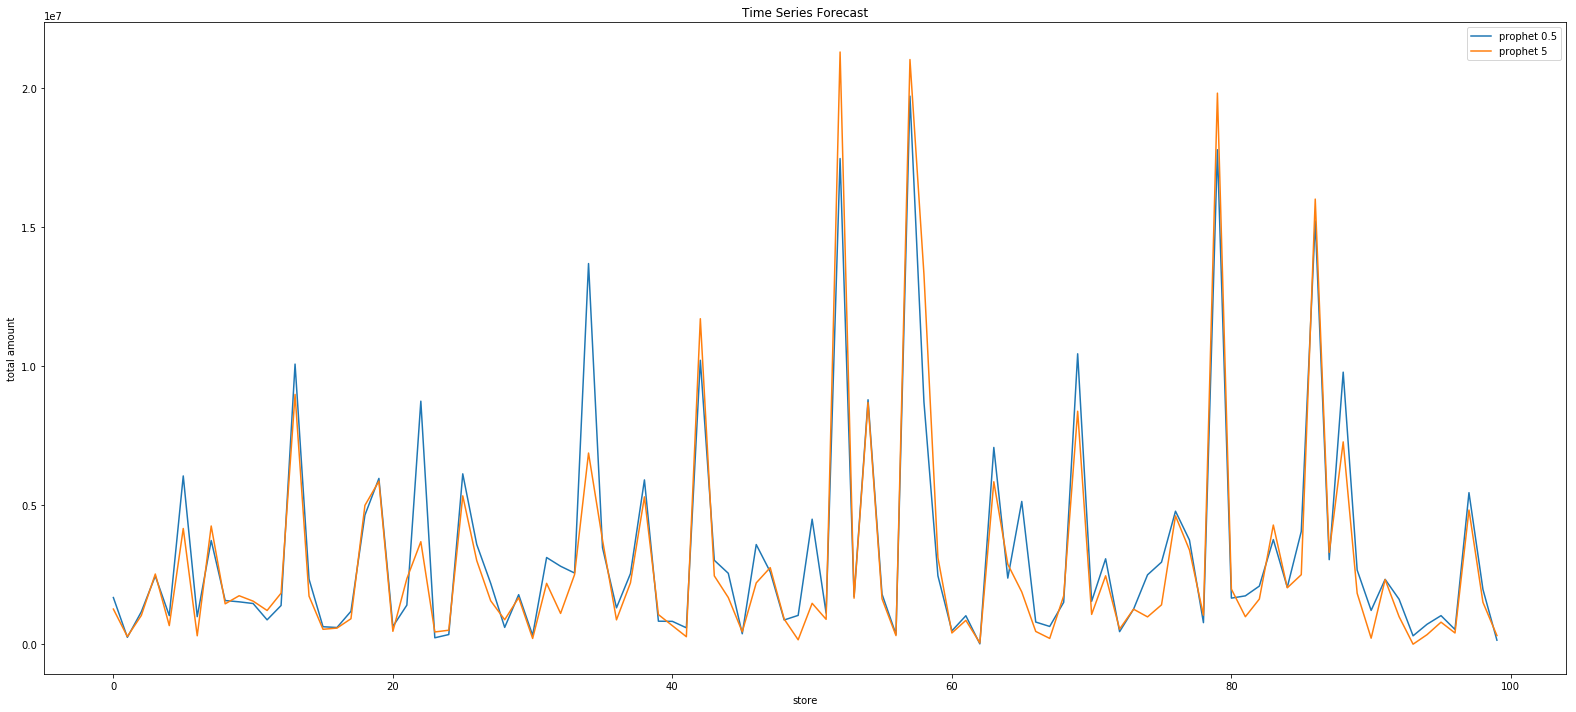

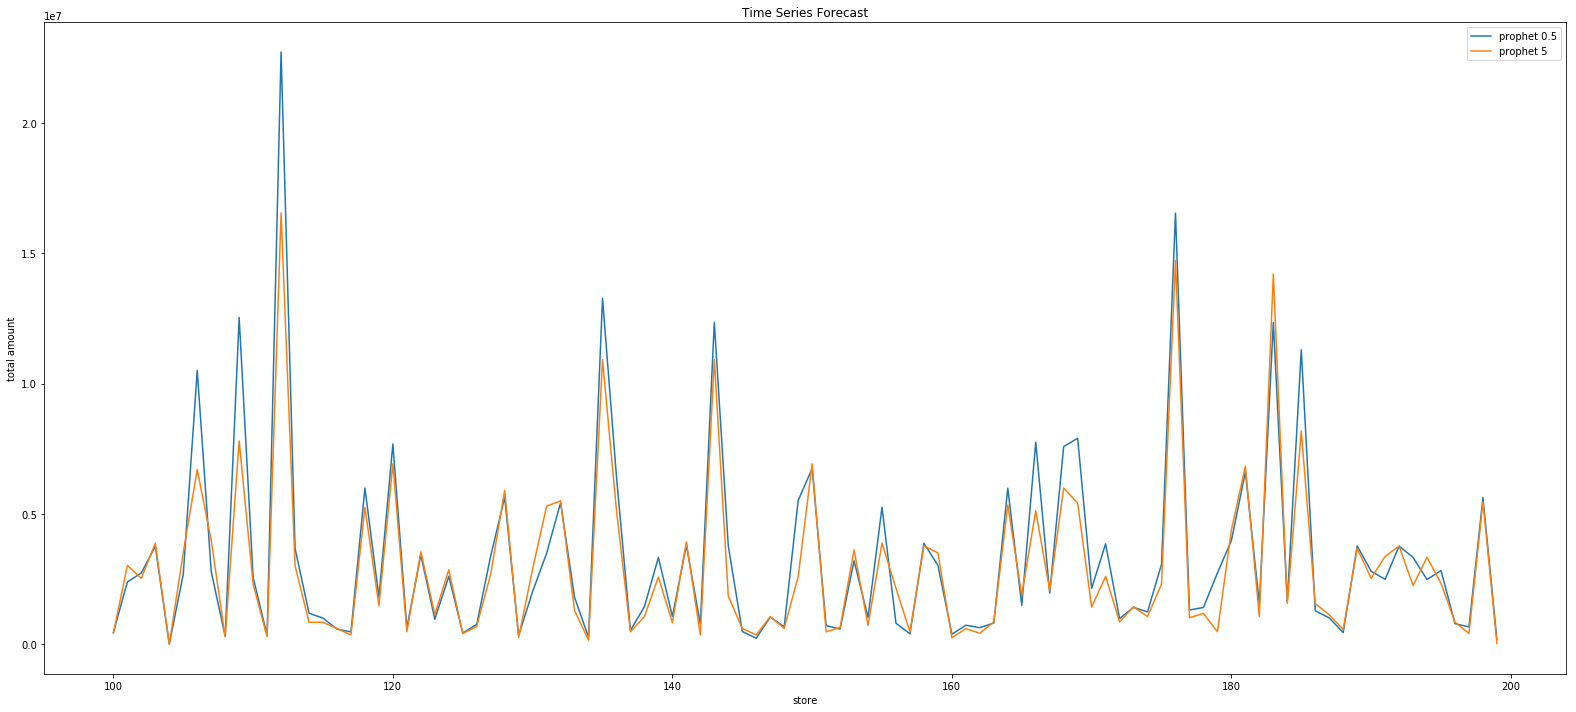

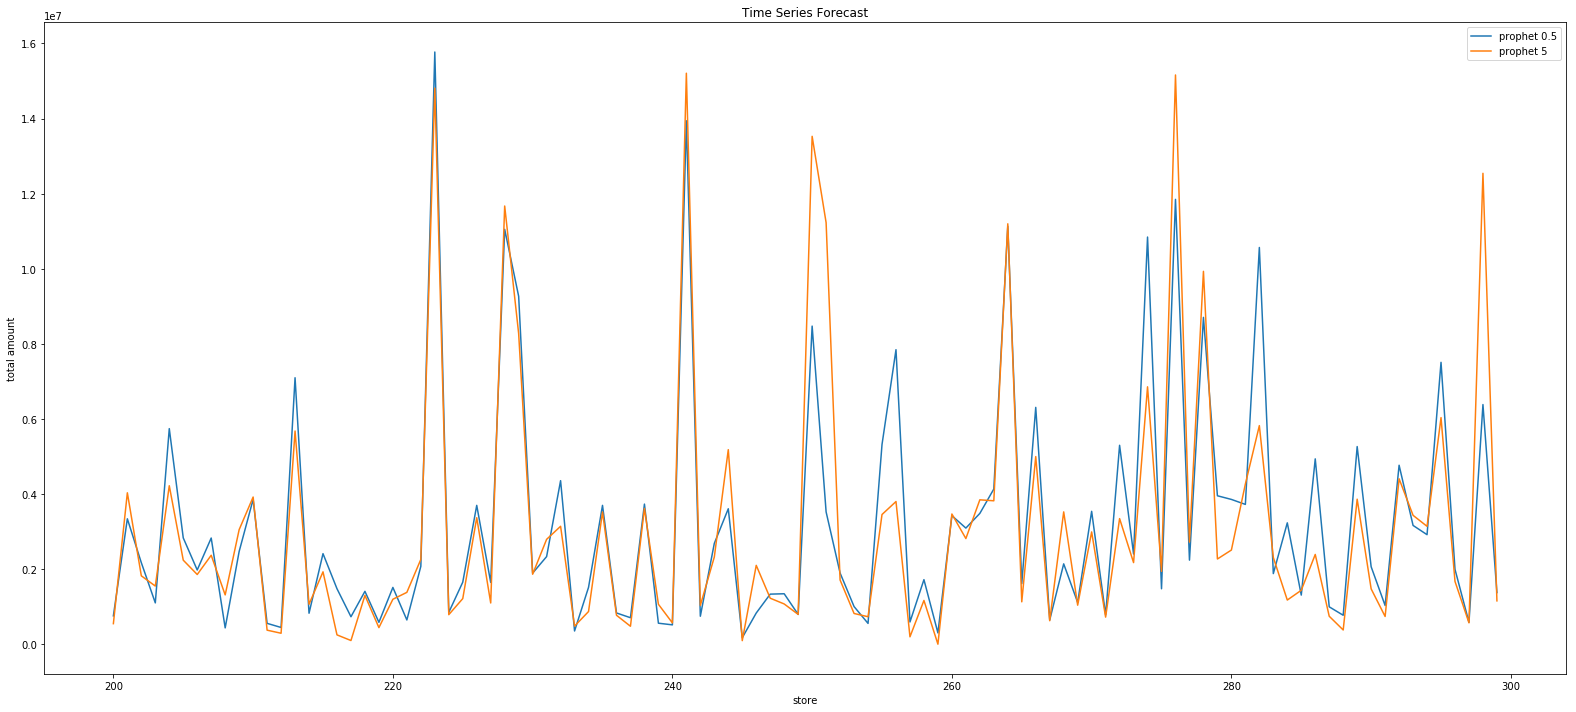

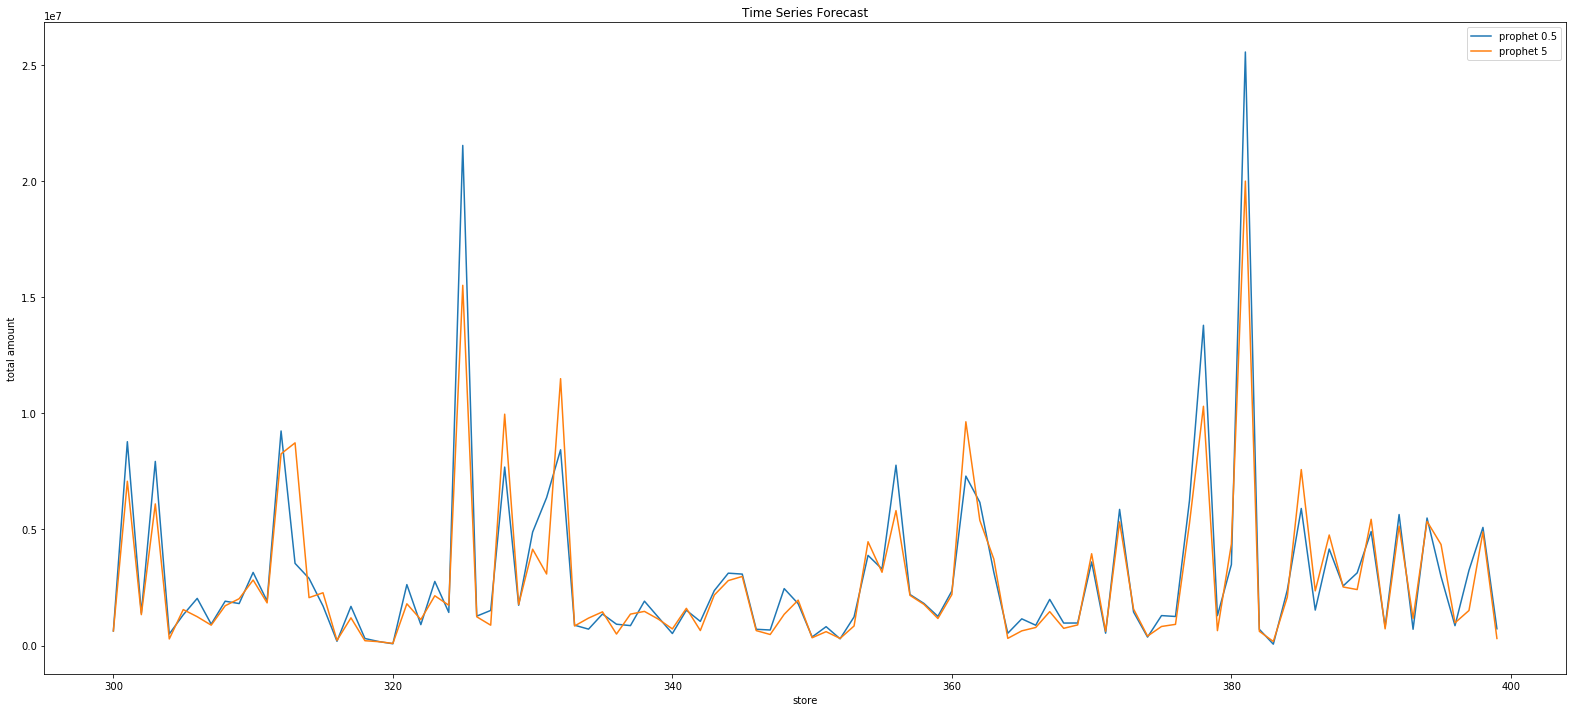

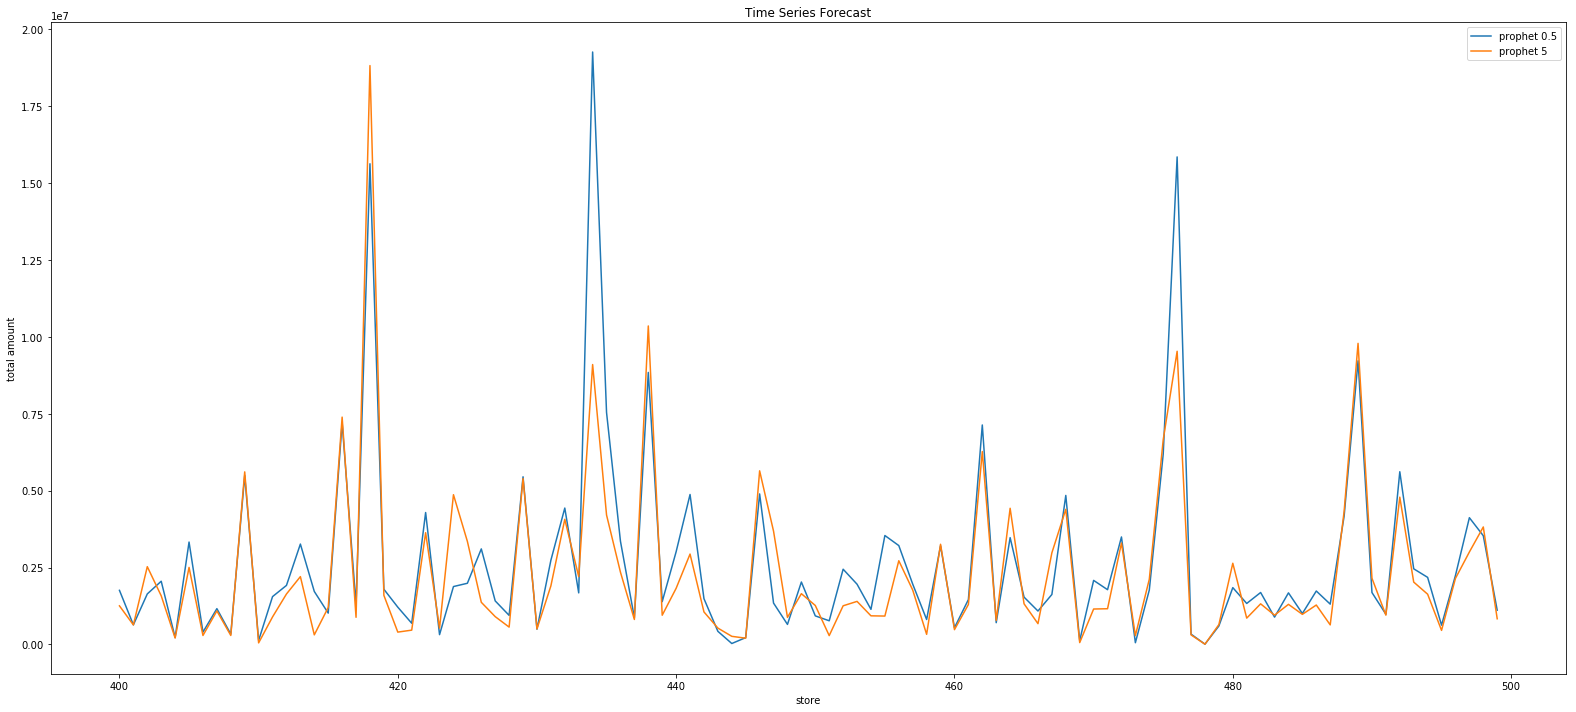

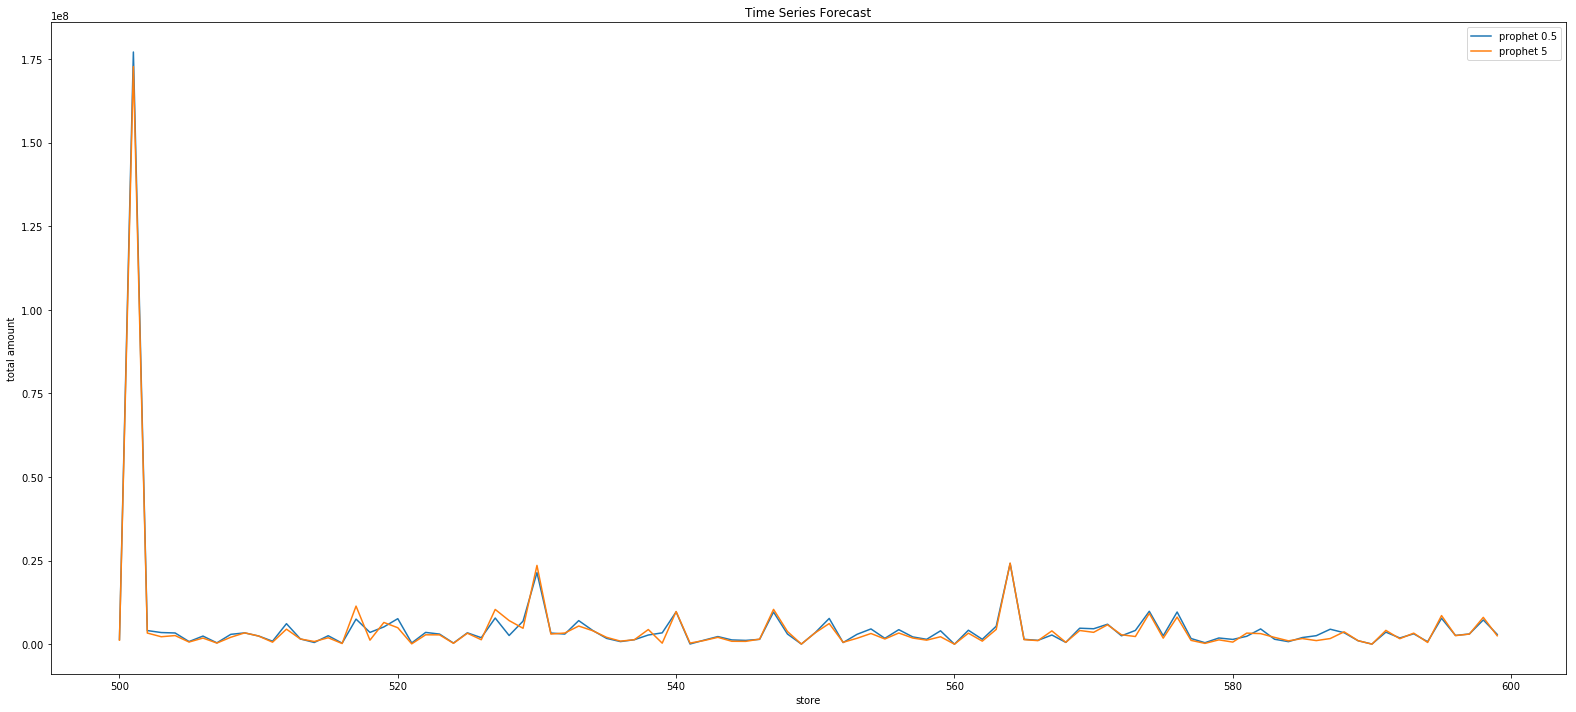

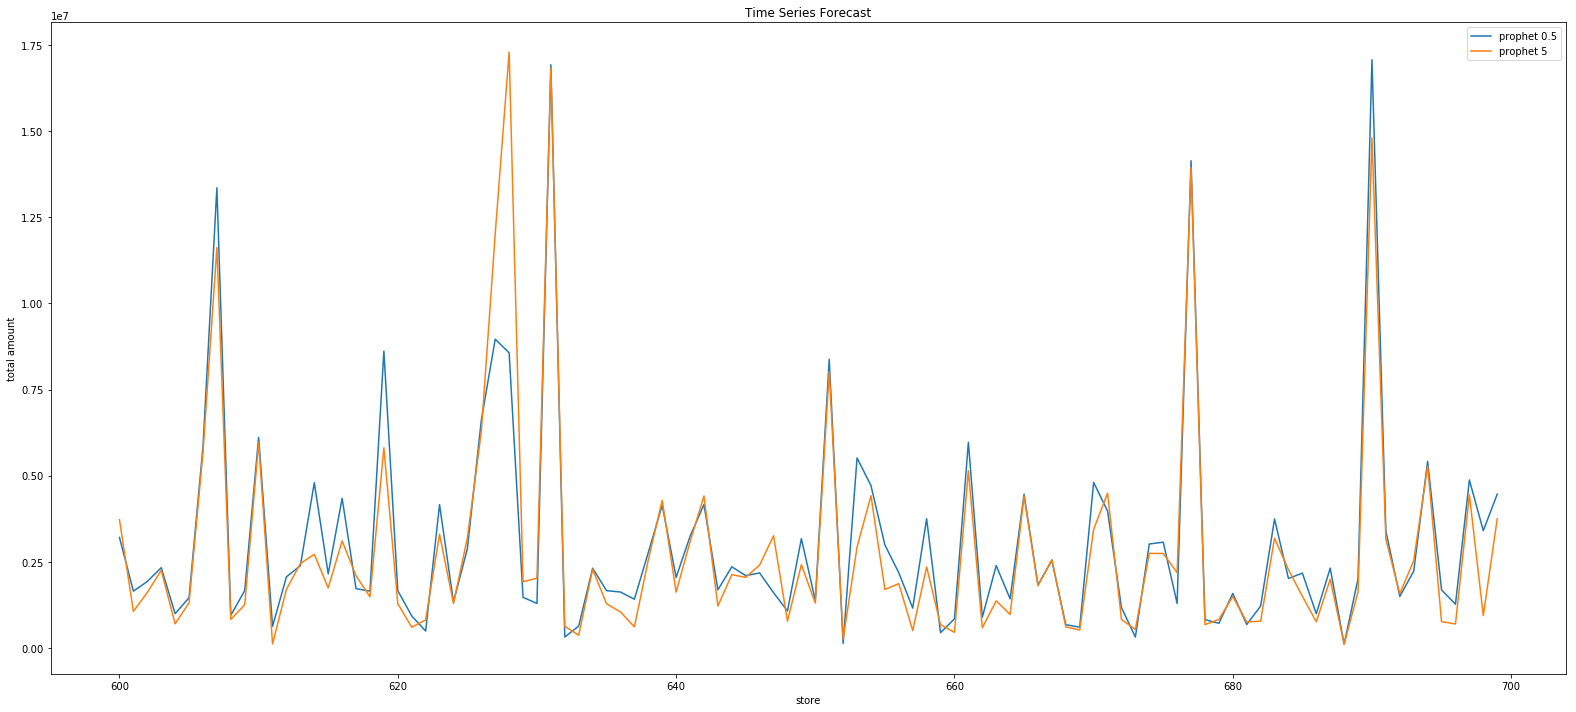

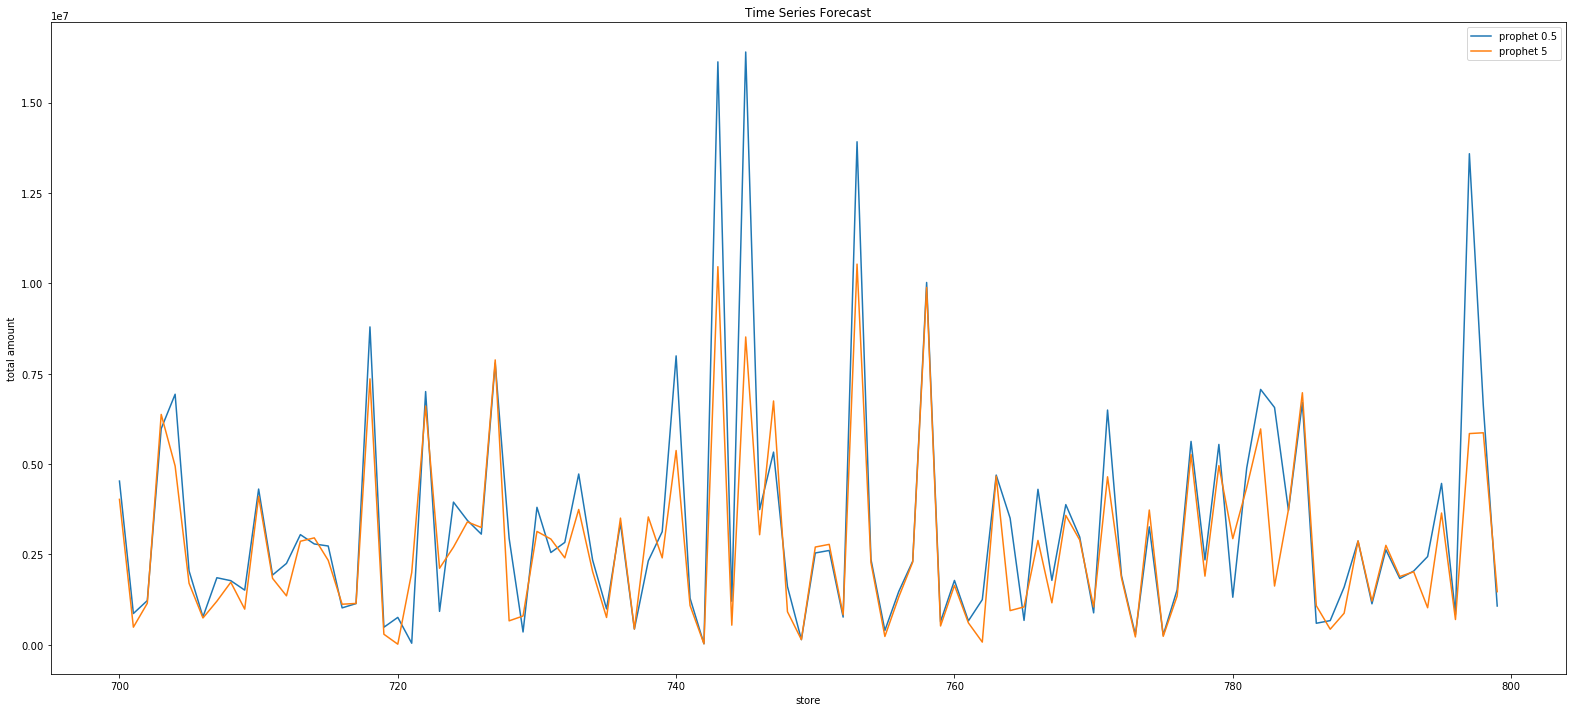

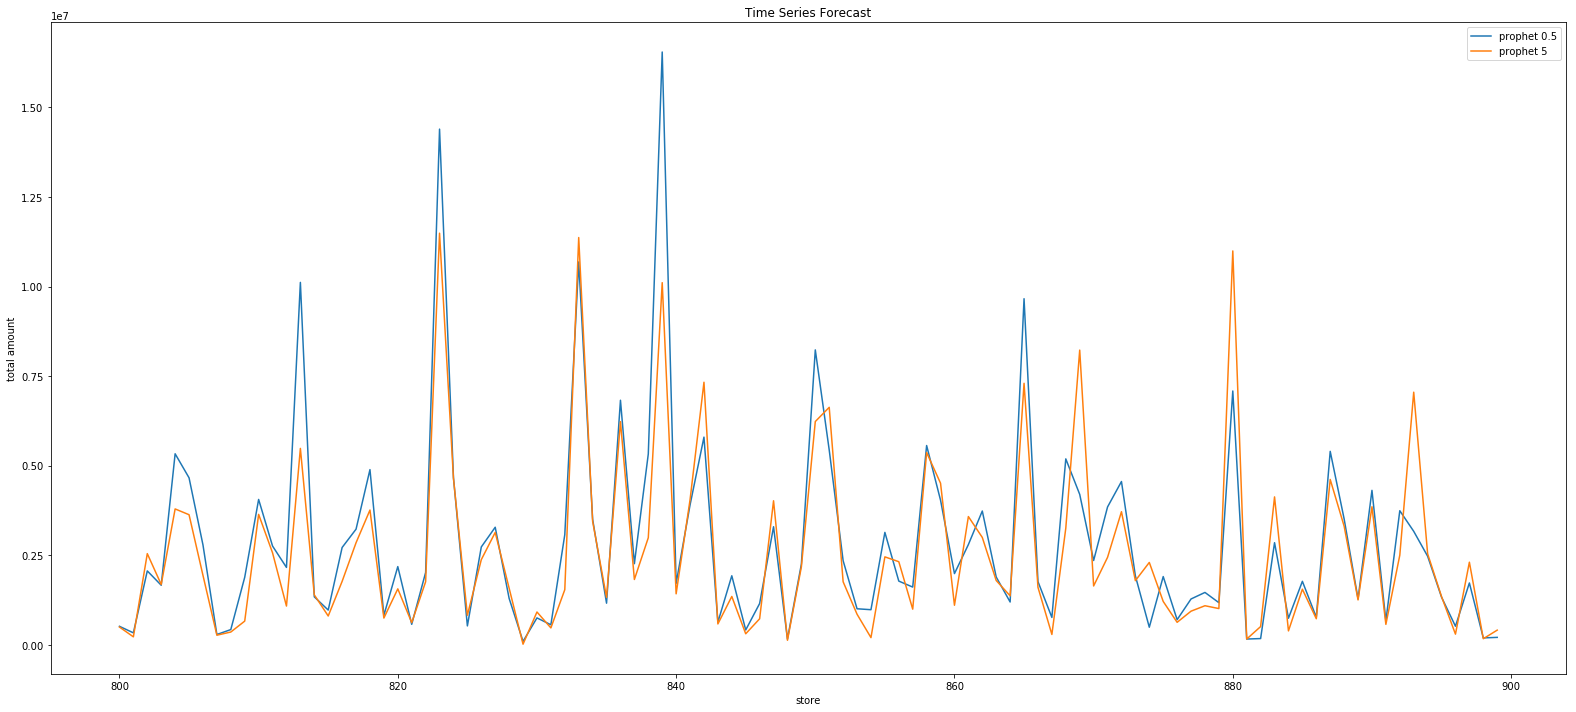

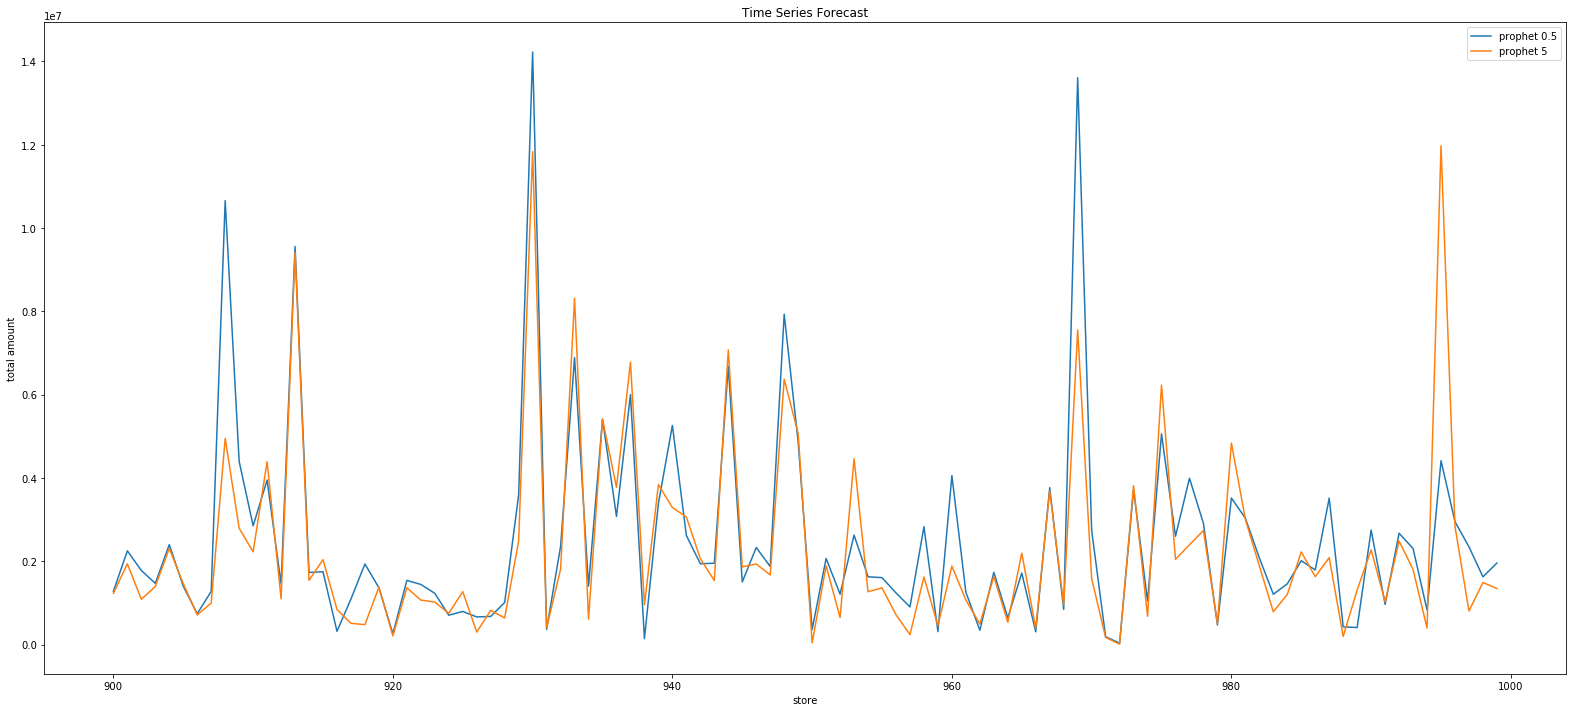

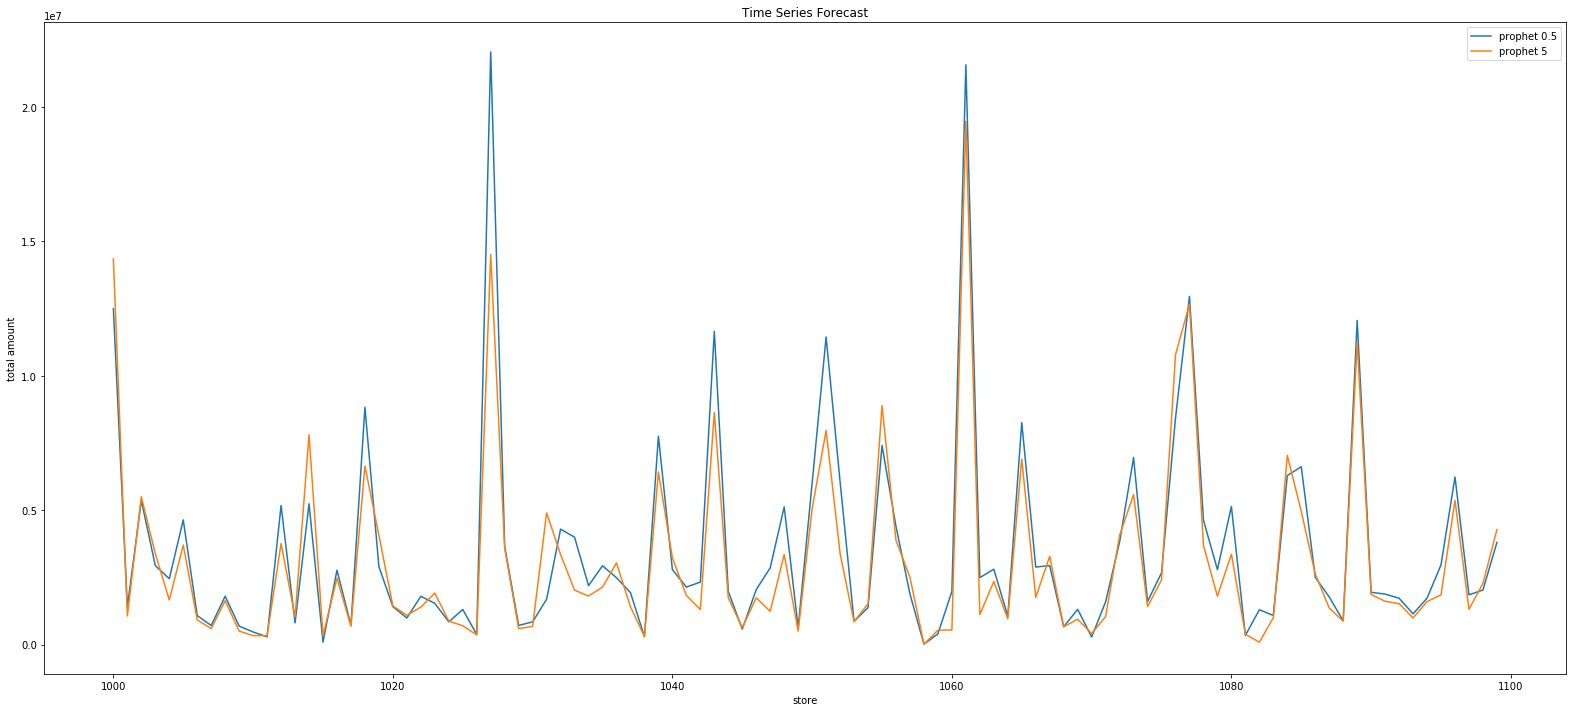

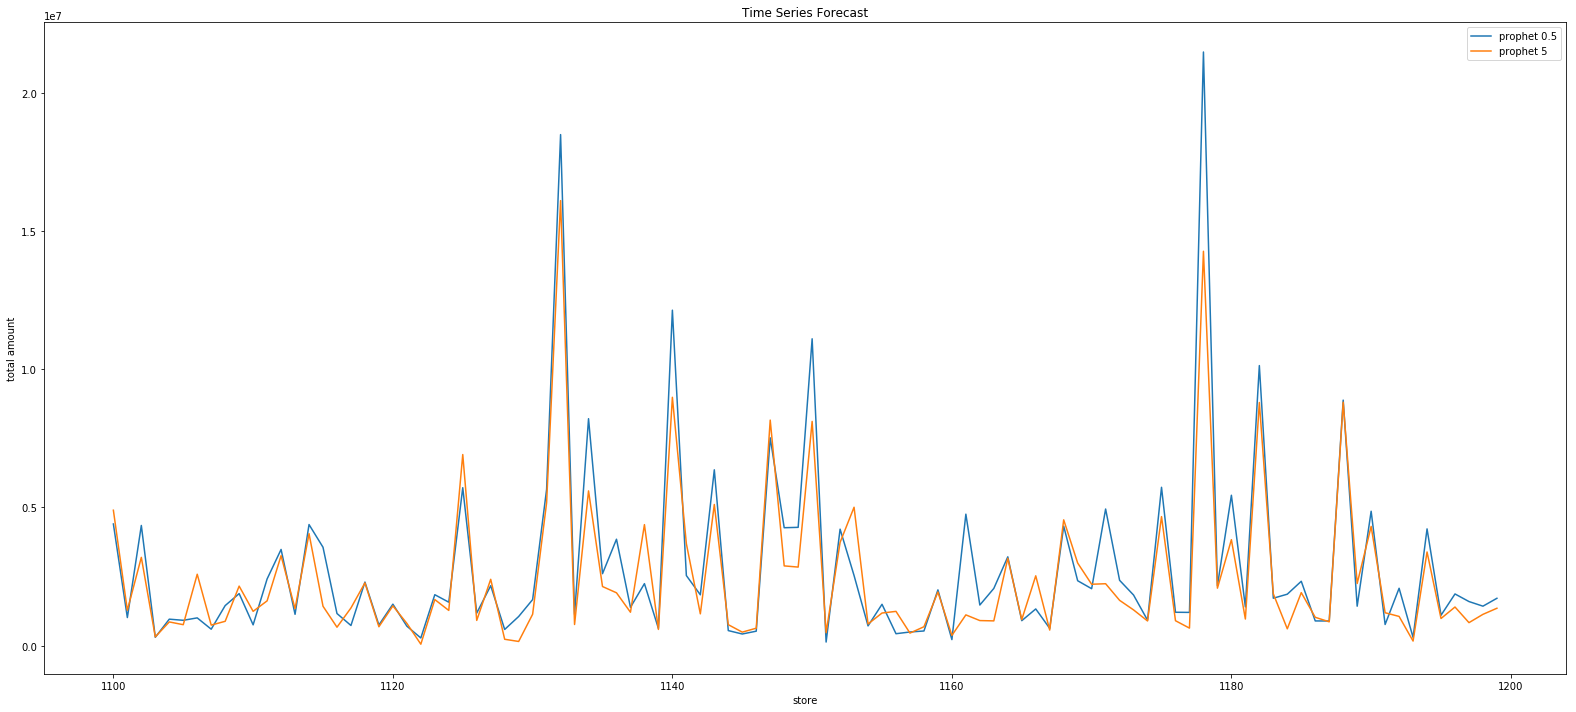

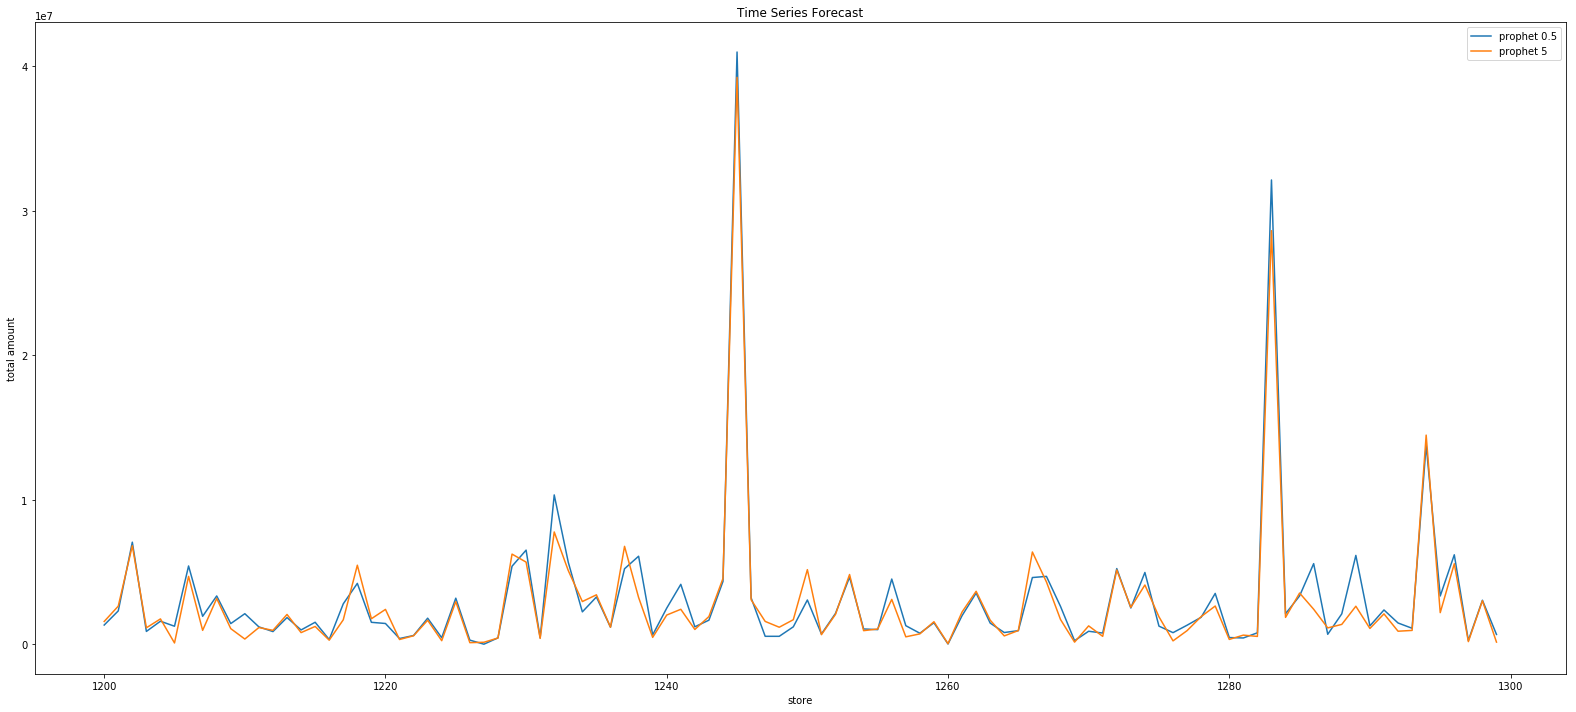

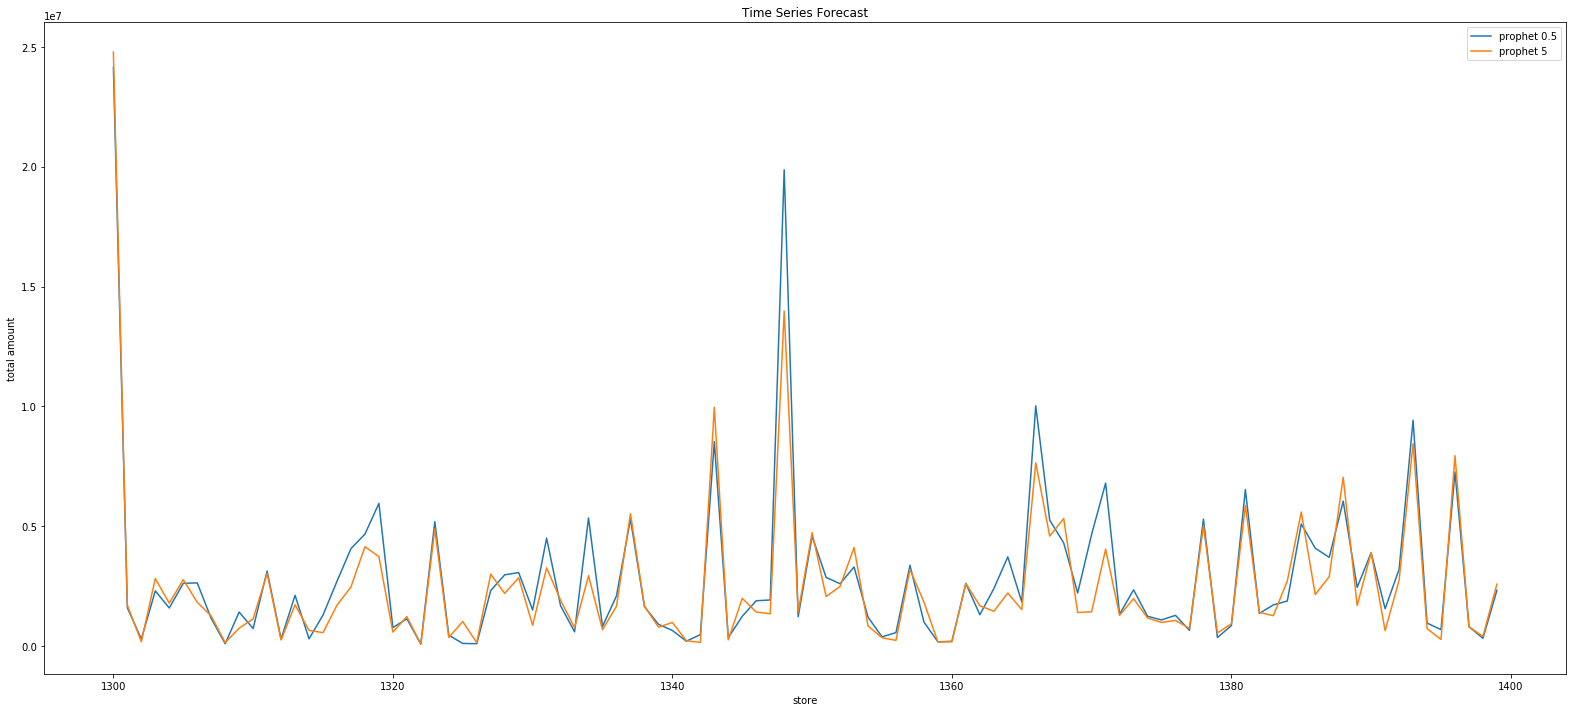

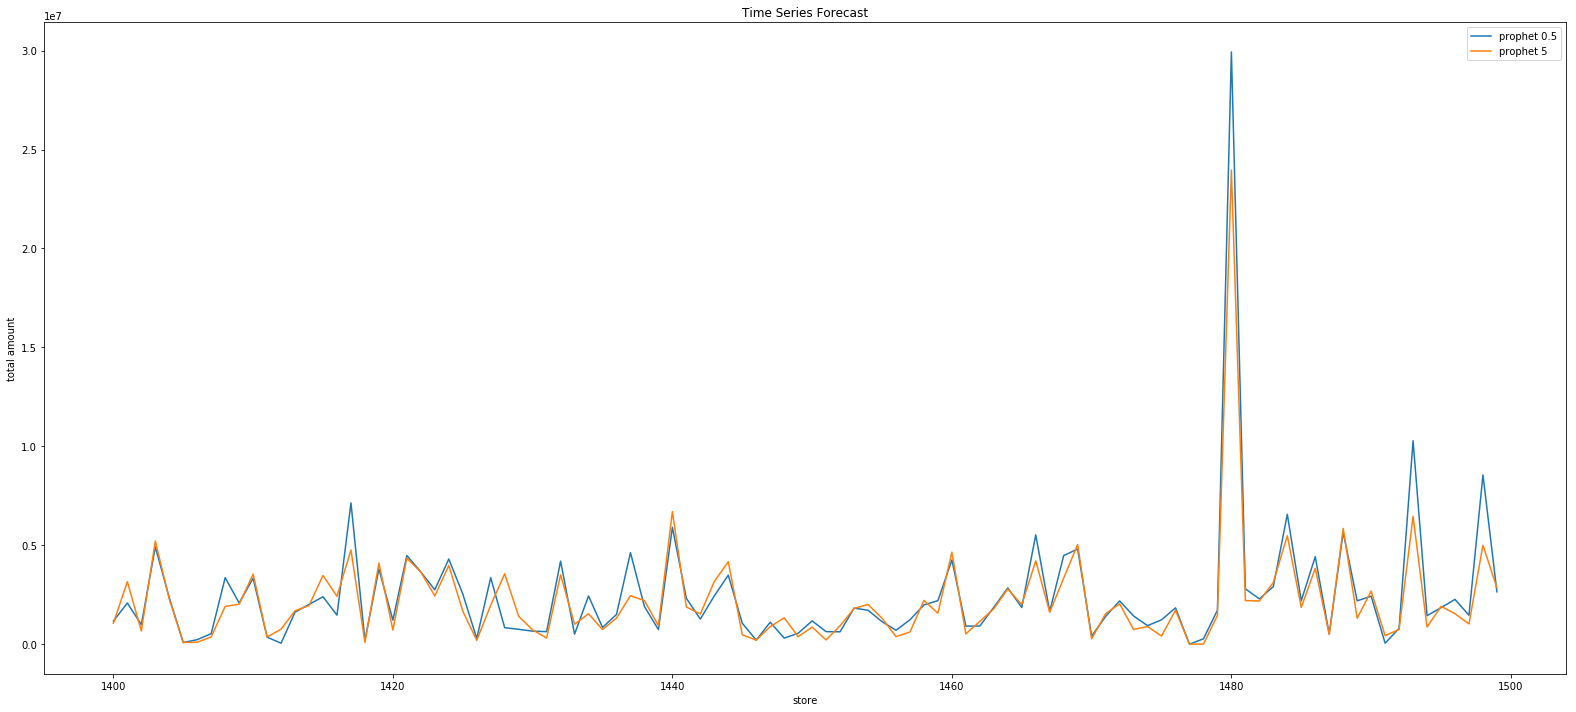

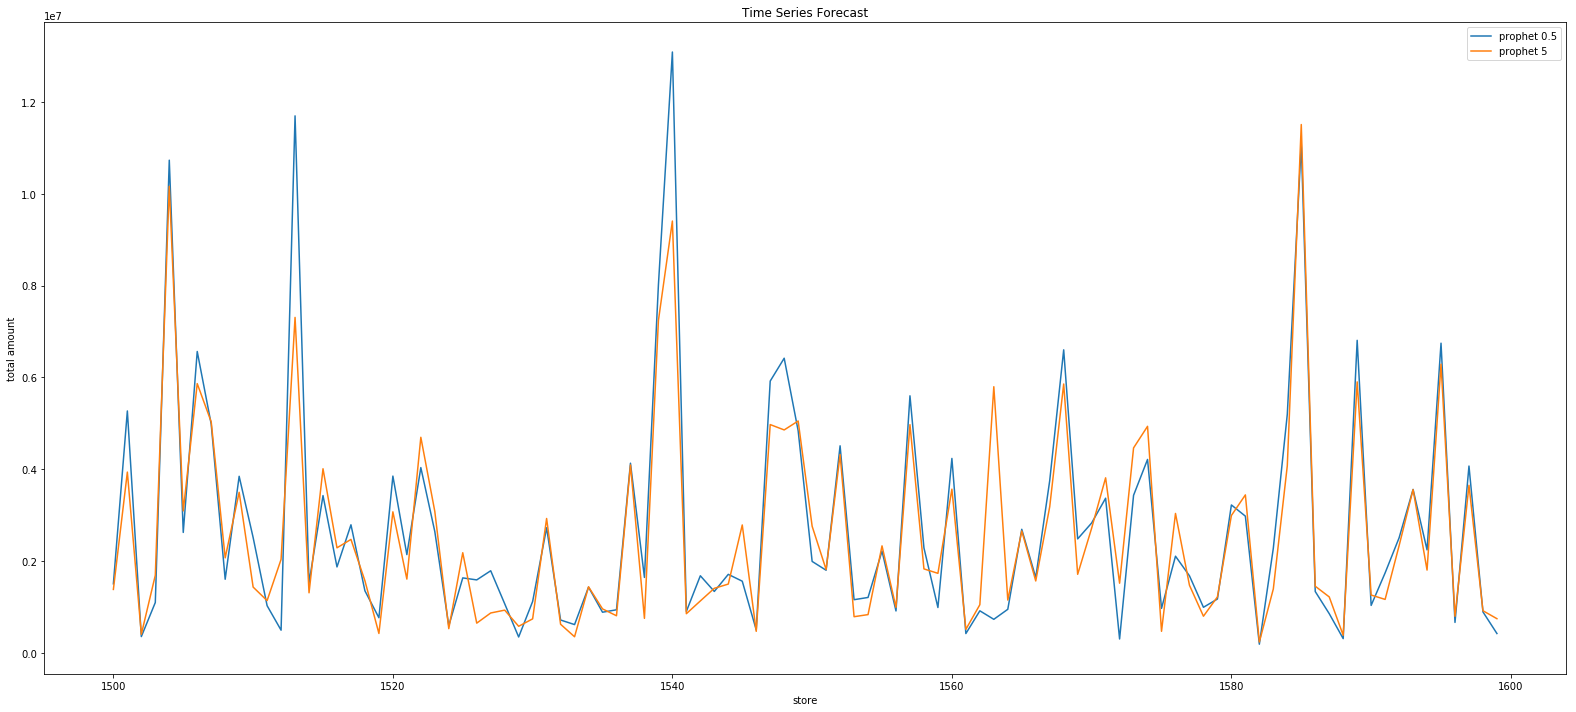

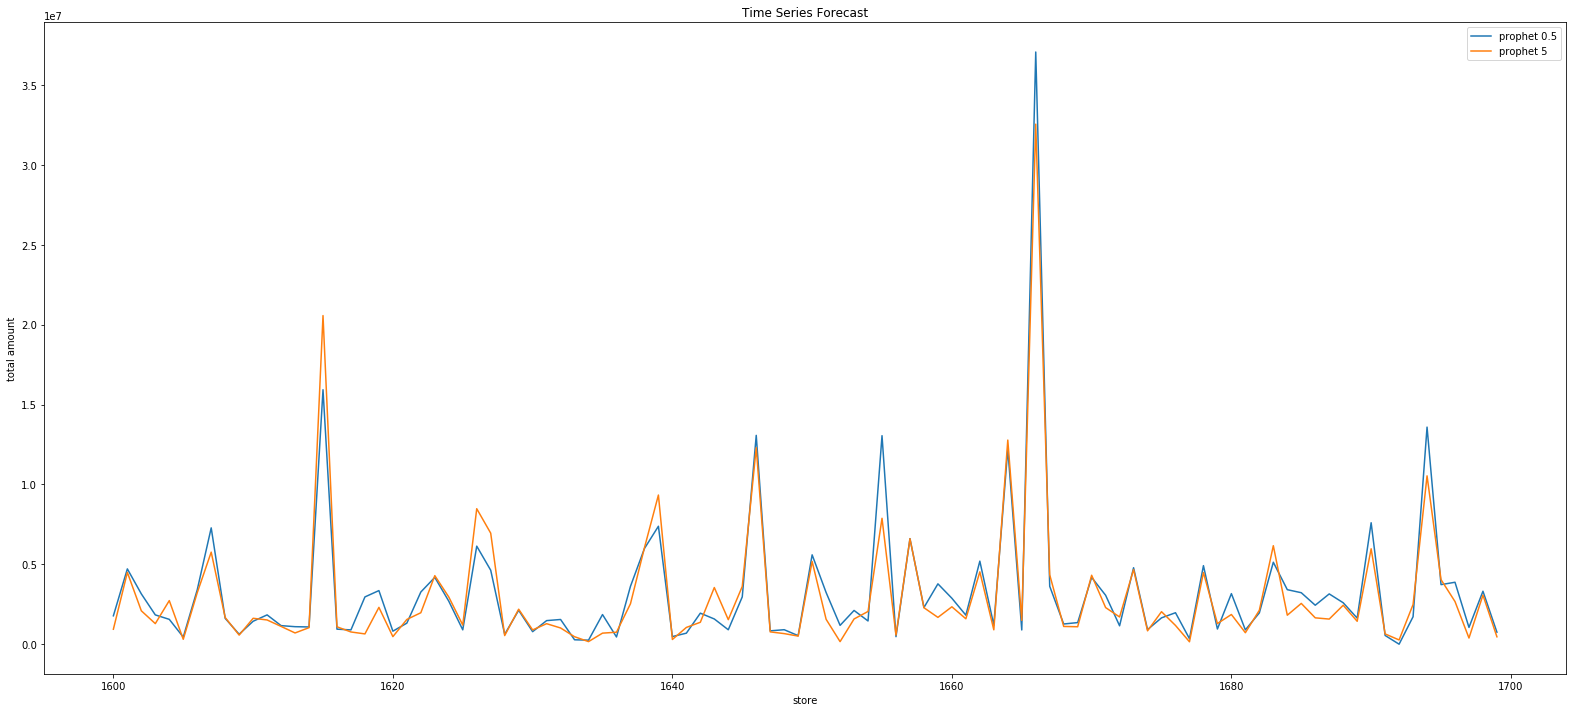

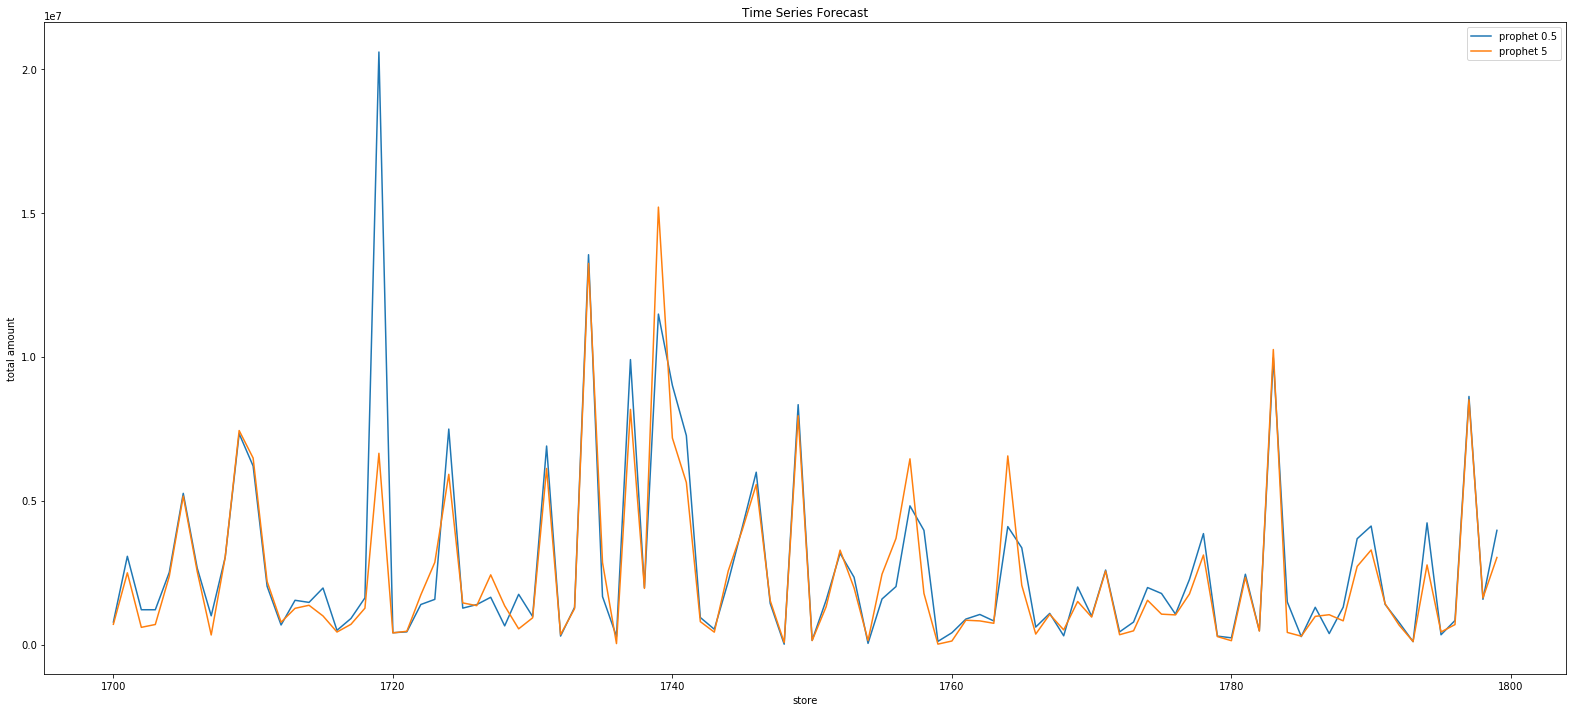

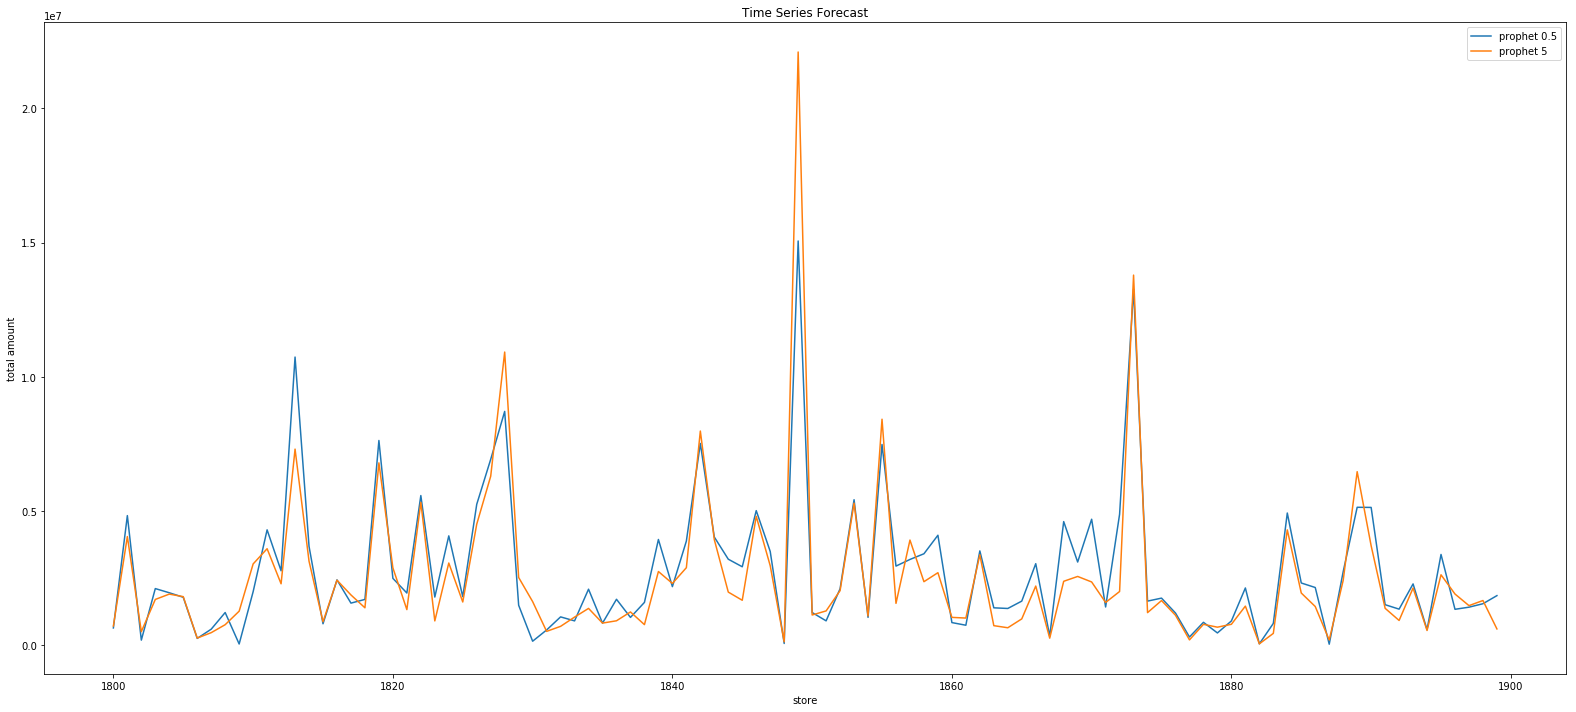

In [95]:
for i in np.arange(0,1900,100):

    start = i
    end = i+ 100

    plt.figure(figsize=(22,10))
    plt.plot(prophet.amount[start:end],label = "prophet 0.5")
    plt.plot(prophet2.amount[start:end],label = "prophet 5")
    
    plt.title("Time Series Forecast")
    plt.xlabel("store")
    plt.ylabel("total amount")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [96]:
from sklearn.metrics import mean_absolute_error
train_mae = mean_absolute_error(prophet2[:], prophet[:])
print("mae : {:2f}".format(train_mae))

mae : 347884.552528


In [86]:
prophet_minus = prophet[prophet.amount==0]
prophet_new = prophet
minus_id = prophet_minus.store_id

# print(prophet_minus)
print(minus_id)
print(len(minus_id))

val = {}
for store_id in minus_id:
    val[store_id] = arima165[arima165.store_id==store_id].values[0][1]

print(val)

for idx, row in prophet_new.iterrows():
    try:
        store_id = row[0]
        amount = row[1]
        if(amount==0):
            prophet_new.loc[idx, 'amount'] = val[store_id] 
    except:
        print('store_id = %d' % (store_id))
        print(amount)
        
print("asdfasdf")
print(prophet_new[prophet_new.amount==0].count())
print(prophet_new.count())


# prophet_new = prophet
# prophet_new['amount'] =  prophet_new['amount'].apply((lambda x: x if x>0 else 0)) # 신용카드
# print(prophet_new[prophet_new.amount < 0].count())
# print(prophet_new.count())
# print(arima165)


104      111
560      599
749      802
1058    1139
1405    1520
1477    1598
1882    2048
1902    2070
Name: store_id, dtype: int64
8
{1520: 85214.32348587718, 2048: 47193.05669337375, 802: 140813.7877512919, 1139: 18815.441299294864, 2070: 746007.4020457086, 599: 2057.642541015125, 1598: 823.9533270661259, 111: 8167.132157781089}
asdfasdf
store_id    0
amount      0
dtype: int64
store_id    1967
amount      1967
dtype: int64


In [87]:
prophet_new.to_csv("result/prophet2W6P-CPS5-logistic-pos.csv", mode='w',index=False) # 새파일로 덮어쓰기
print("done")

done
